# 1) Runing dask

Most of the times when we are using Dask, we will be using a distributed scheduler, which exists in the context of a Dask cluster. The Dask cluster is structured as

<p align="center">
  <img src="./images/distributed-overview.png" alt="My Image" width="700"/>
</p>

We can create a local dask cluster

In [1]:
import dask.dataframe as dd
from dask.distributed import Client

client = Client(n_workers = 4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 31.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:59245,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 31.92 GiB
Comm: tcp://127.0.0.1:59268,Total threads: 4
Dashboard: http://127.0.0.1:59272/status,Memory: 7.98 GiB
Nanny: tcp://127.0.0.1:59248,


Our cluster object has attributes and methods which we can use to access information about our cluster. For instance we can get the log output from the scheduler and all the workers with the get_logs() method.

In [2]:
client.cluster.get_logs()

{'Cluster': '',
 'Scheduler': '2024-12-07 23:51:55,582 - distributed.scheduler - INFO - Receive client connection: Client-da42fc8b-b4ed-11ef-b6d4-18c04d228bb0\n2024-12-07 23:51:55,544 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:59270\n2024-12-07 23:51:55,543 - distributed.scheduler - INFO - Register worker addr: tcp://127.0.0.1:59270 name: 1\n2024-12-07 23:51:55,524 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:59269\n2024-12-07 23:51:55,523 - distributed.scheduler - INFO - Register worker addr: tcp://127.0.0.1:59269 name: 3\n2024-12-07 23:51:55,522 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:59268\n2024-12-07 23:51:55,521 - distributed.scheduler - INFO - Register worker addr: tcp://127.0.0.1:59268 name: 0\n2024-12-07 23:51:55,424 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:59264\n2024-12-07 23:51:55,421 - distributed.scheduler - INFO - Register worker addr: tcp://127.0.0.1:59264 name: 2\n2024-12-07 23:51:53,911 - distributed.scheduler - INFO - Registering Worker plugin shuffle\n2024-12-07 23:51:53,911 - distributed.scheduler - INFO -   dashboard at:  http://127.0.0.1:8787/status\n2024-12-07 23:51:53,911 - distributed.scheduler - INFO -   Scheduler at:     tcp://127.0.0.1:59245\n2024-12-07 23:51:53,884 - distributed.scheduler - INFO - State start',
 'tcp://127.0.0.1:59264': '2024-12-07 23:51:55,425 - distributed.worker - INFO - -------------------------------------------------\n2024-12-07 23:51:55,425 - distributed.worker - INFO -         Registered to:      tcp://127.0.0.1:59245\n2024-12-07 23:51:55,425 - distributed.worker - INFO - Starting Worker plugin shuffle\n2024-12-07 23:51:54,999 - distributed.worker - INFO - -------------------------------------------------\n2024-12-07 23:51:54,998 - distributed.worker - INFO -       Local Directory: C:\\Users\\adam6\\AppData\\Local\\Temp\\dask-scratch-space\\worker-0w33ug5x\n2024-12-07 23:51:54,998 - distributed.worker - INFO -                Memory:                   7.98 GiB\n2024-12-07 23:51:54,998 - distributed.worker - INFO -               Threads:                          4\n2024-12-07 23:51:54,998 - distributed.worker - INFO - -------------------------------------------------\n2024-12-07 23:51:54,998 - distributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:59245\n2024-12-07 23:51:54,998 - distributed.worker - INFO -          dashboard at:            127.0.0.1:59265\n2024-12-07 23:51:54,998 - distributed.worker - INFO -           Worker name:                          2\n2024-12-07 23:51:54,998 - distributed.worker - INFO -          Listening to:      tcp://127.0.0.1:59264\n2024-12-07 23:51:54,998 - distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:59264',
 'tcp://127.0.0.1:59268': '2024-12-07 23:51:55,523 - distributed.worker - INFO - -------------------------------------------------\n2024-12-07 23:51:55,523 - distributed.worker - INFO -         Registered to:      tcp://127.0.0.1:59245\n2024-12-07 23:51:55,523 - distributed.worker - INFO - Starting Worker plugin shuffle\n2024-12-07 23:51:55,082 - distributed.worker - INFO - -------------------------------------------------\n2024-12-07 23:51:55,082 - distributed.worker - INFO -       Local Directory: C:\\Users\\adam6\\AppData\\Local\\Temp\\dask-scratch-space\\worker-cxfv39fh\n2024-12-07 23:51:55,082 - distributed.worker - INFO -                Memory:                   7.98 GiB\n2024-12-07 23:51:55,082 - distributed.worker - INFO -               Threads:                          4\n2024-12-07 23:51:55,082 - distributed.worker - INFO - -------------------------------------------------\n2024-12-07 23:51:55,082 - distributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:59245\n2024-12-07 23:51:55,082 - distributed.worker - INFO -          dashboard at:            127.0.0.1:59272\n2024-12-07 23:51:55,082 - distributed.worker - INFO -  

In [3]:
client.cluster.dashboard_link

'http://127.0.0.1:8787/status'

What else about clusters: 
- SSH connection
- Scaling clusters via n_workers or automaticly

In [41]:
import os
#folder for visualizations
os.makedirs("./.visualizations", exist_ok=True)

# 2) Runing big pandas

Now lets load a aws dataset to our local cluster, we load only part.0 it has enough data for a demonstartion purposes.

In [4]:
ddf = dd.read_parquet(
    #"s3://dask-data/nyc-taxi/nyc-2015.parquet/part.*.parquet",0
    "s3://dask-data/nyc-taxi/nyc-2015.parquet/part.0.parquet",
    columns=["passenger_count", "tip_amount"],
    storage_options={"anon": True},
)

Now, let’s examine the DataFrame. As we can see, there is no data displayed in the output—this is due to Dask’s `lazy loading behavior`. While defining DataFrames or performing operations, Dask schedules computations but doesn’t execute them immediately. We can view this task/datafrane graph using .visualize() and `graphviz`. To trigger the actual computation, we need to call the special method compute(). For quick data inspection, we can use methods like head() or tail().

`graphviz`
- Windows link https://graphviz.org/
- Debian*, Ubuntu* 
```sudo apt install graphviz```

In [5]:
ddf

,passenger_count,tip_amount
npartitions=1,,
,int32,float64
,...,...


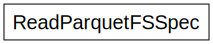

In [17]:
ddf.visualize()

As we can see the length of dataframe is pretty big the whole set comes to about 100 000 000 rows. While the single read file has 2 799 584

In [6]:
len(ddf)

2799584

In [7]:
ddf.head()

,passenger_count,tip_amount
0,5,0.0
1,3,0.0
2,1,0.0
3,1,0.0
4,2,0.0


In [8]:
ddf.tail()

,passenger_count,tip_amount
2799579,6,1.10
2799580,1,1.50
2799581,1,5.94
2799582,1,0.00
2799583,1,1.20


Now we can define a basic computation on dataframe. Because the dask dataframe mimics the pandas one we can use their syntax. In this example we count how many taxi ride had a tip amount bigger than 0.

In [9]:
results = ddf[ddf['tip_amount'] > 0.0].groupby("passenger_count").passenger_count.count()
results

Dask Series Structure:
npartitions=1
    int64
      ...
Dask Name: count, 6 expressions
Expr=Count(frame=(Filter(frame=ReadParquetFSSpec(a70a608), predicate=ReadParquetFSSpec(a70a608)['tip_amount'] > 0.0))[['passenger_count']], observed=False, _slice='passenger_count')

As mentioned before, Dask does not perform computations immediately. We need to call the compute function to calculate the grouped DataFrame.

In [26]:
results.compute()

passenger_count
0        214
1    1077677
2     219797
3      62286
4      28331
5      83098
6      54546
7          2
8          3
9          1
Name: passenger_count, dtype: int64

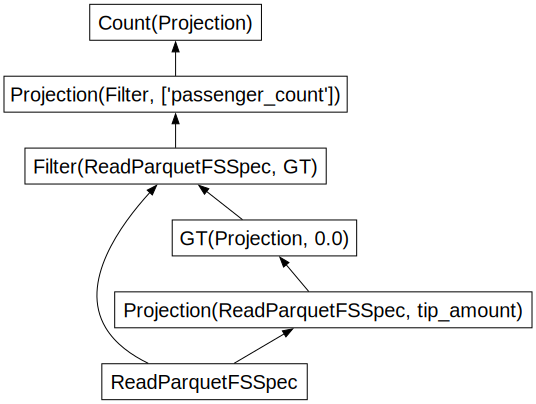

In [16]:
results.visualize()

Lets perform a few more computations

In [11]:
results1 = ddf.groupby("passenger_count").tip_amount.mean()
results1

Dask Series Structure:
npartitions=1
    float64
        ...
Dask Name: getitem, 4 expressions
Expr=((ReadParquetFSSpec(a70a608)[['passenger_count', 'tip_amount']]).mean(observed=False, chunk_kwargs={'numeric_only': False}, aggregate_kwargs={'numeric_only': False}, _slice='tip_amount'))['tip_amount']

In [12]:
results1.compute()

passenger_count
0    1.201922
1    1.425774
2    1.438624
3    1.313261
4    1.183317
5    1.415911
6    1.374659
7    1.666667
8    1.950000
9    1.250000
Name: tip_amount, dtype: float64

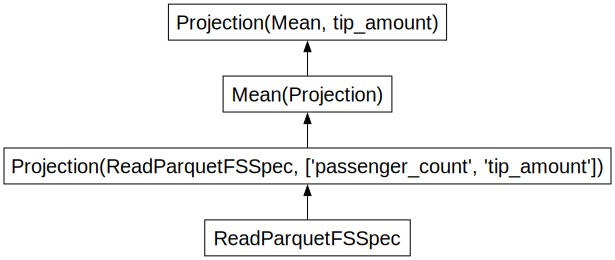

In [13]:
results1.visualize()

# 2) Parallel code in dask

Let's test the parrel options in dask. First lets create some basinc functions so we can later compare the non-parallel with parallel versions

In [28]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1


def add(x, y):
    sleep(1)
    return x + y

In [29]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: total: 78.1 ms
Wall time: 3 s


## Parallel functions basic example

Now to create the dask parallel functions we have to use the `@dask.delayed` decorator which will make the functions `lazy`. When we call the delayed version by passing the arguments, exactly as before, the original function isn't actually called yet - which is why the cell execution finishes very quickly. Instead, a delayed object is made, which keeps track of the function to call and the arguments to pass to it.

In [30]:
import dask

@dask.delayed
def inc(x):
    sleep(1)
    return x + 1


@dask.delayed
def add(x, y):
    sleep(1)
    return x + y

In [22]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: total: 0 ns
Wall time: 1 ms


In [23]:
%%time

z.compute()

CPU times: total: 109 ms
Wall time: 2.02 s


5

## Results object

The z object is a lazy Delayed object. This object holds everything we need to compute the final result, including references to all of the functions that are required and their inputs and relationship to one-another. We can evaluate the result with .compute() as above or we can visualize the task graph for this value with .visualize().

In [31]:
z

5

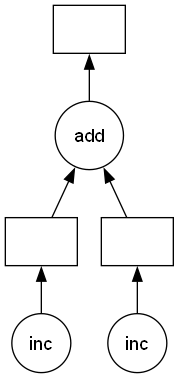

In [24]:
z.visualize()

## Paralize with big pandas

Now as we understand the basics of parallel programing in dask we can perform more complex computations. First lets create some csv files that will be read to dask and later we will perform the basic computations. We will use the data from dask tutorial which is downloaded via prep.py file.

In [56]:
%run prep.py -d flights

- Downloading NYC Flights dataset... done
- Extracting flight data... done
- Creating json data... done
** Created flights dataset! in 10.70s**


In [57]:
import pandas as pd

df = pd.read_csv(os.path.join("data", "nycflights", "1990.csv"))
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [58]:
from glob import glob

filenames = sorted(glob(os.path.join("data", "nycflights", "*.csv")))

In [98]:
%%time

sums = []
counts = []
for fn in filenames:
    df = pd.read_csv(fn)
    by_origin = df.groupby("Origin")
    total = by_origin.DepDelay.sum()
    count = by_origin.DepDelay.count()
    sums.append(total)
    counts.append(count)

total_delays = sum(sums)
n_flights = sum(counts)
mean = total_delays / n_flights
mean

CPU times: total: 4.36 s
Wall time: 4.5 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [102]:
%%time

sums = []
counts = []

@dask.delayed
def read_file(filename):
    return pd.read_csv(filename)


for fn in filenames:
    df = read_file(fn)
    by_origin = df.groupby("Origin")
    total = by_origin.DepDelay.sum()
    count = by_origin.DepDelay.count()
    sums.append(total)
    counts.append(count)

total_delays = sum(sums)
n_flights = sum(counts)
mean, *_ = dask.compute(total_delays / n_flights)
mean

CPU times: total: 344 ms
Wall time: 1.83 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

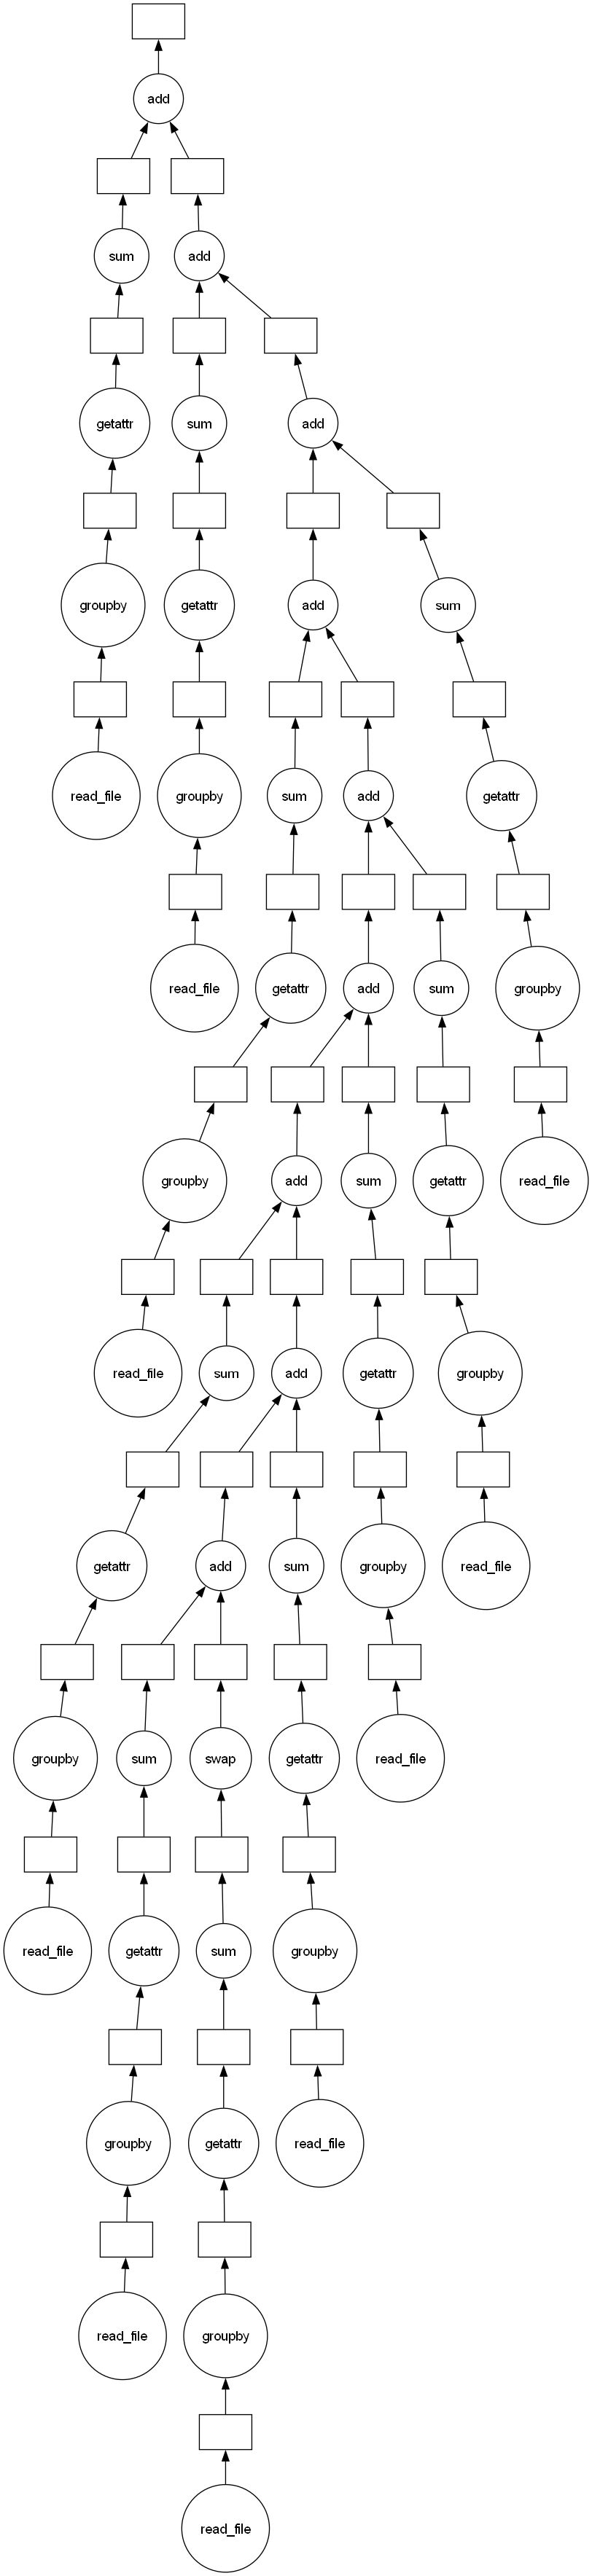

In [107]:
(sum(sums)).visualize()

In [104]:
client.close()